<a href="https://colab.research.google.com/github/resh1604/SIT742/blob/master/SIT742RLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIT742: Modern Data Science 
**(Assessment Task 02: Bank Marketing Data Analytics)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

**Project Group Information:** 
- GROUP NUMBER: 118
- Names: Reshita Minocha, Latha Balavari, Nishtha Gupta
- Student IDs: 217435691, 218207168, 
- Emails: rminocha@deakin.edu.au, lbalavari@deakin.edu.au, guptani@deakin.edu.au


## 1. Import Spark

In [1]:
# WGET is a free tool to download files and crawl websites via the command line
# OpenJDK Development Kit (JDK) (headless) OpenJDK is a development environment for building applications, applets, and components using the Java programming language
# Apache Spark is an open-source distributed general-purpose cluster-computing framework
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark

# os.environ[" "] ->  Sets the enviroment variable
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"

  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
# findspark.init() -> makes pyspark importable as a regular library
# SparkSession is an entry point where control is transferred from the operating system to the provided program
import findspark
findspark.init()
from pyspark.sql import SparkSession 

## 2. Read and check data

In [4]:
# WGET is a free tool to download files and crawl websites via the command line
!pip install wget

In [0]:
# link_to_data -> links the command line to the mentioned path
# wget.download(link_to_data) -> downloads the files

import wget

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2019/data/bank.csv'
DataSet = wget.download(link_to_data)

In [6]:
# ls -> lists all the files in the current directory
!ls

bank.csv  sample_data  spark-2.4.0-bin-hadoop2.7  spark-2.4.0-bin-hadoop2.7.tgz


In [8]:
# Creation of SparkSession 
spark = SparkSession.builder.appName('ml-bank').getOrCreate()

# PySpark is a great language for performing exploratory data analysis at scale, building machine learning pipelines, and creating ETLs for a data platform
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import DoubleType, IntegerType, StringType

# StructType objects define the schema of Spark DataFrames. 
# StructType objects contain a list of StructField objects that define the name, type, and nullable flag for each column in a DataFrame
schema = StructType([
    StructField("age", IntegerType()),
    StructField("job", StringType()),
    StructField("marital", StringType()),
    StructField("education", StringType()),
    StructField("default", StringType()),
    StructField("balance", IntegerType()),
    StructField("housing", StringType()),
    StructField("contact", StringType()),
    StructField("day", IntegerType()),
    StructField("month", StringType()),
    StructField("duration", IntegerType()),
    StructField("campaign", IntegerType()),
    StructField("pdays", IntegerType()),
    StructField("previous", IntegerType()),
    StructField("poutcome", StringType()),
    StructField("deposit", StringType())
])

# Import the 'bank.csv' as a Spark dataframe and name it as d
df = spark.read.format("csv").\
        option("header", "true").\
            load("bank.csv")

# withColumn -> returns a new DataFrame with an added column       
df = df.withColumn("age", df["age"].cast(IntegerType()))
df = df.withColumn("balance", df["balance"].cast(IntegerType()))
df = df.withColumn("day", df["day"].cast(IntegerType()))
df = df.withColumn("duration", df["duration"].cast(IntegerType()))
df = df.withColumn("campaign", df["campaign"].cast(IntegerType()))
df = df.withColumn("pdays", df["pdays"].cast(IntegerType()))
df = df.withColumn("previous", df["previous"].cast(IntegerType()))

df

DataFrame[age: int, job: string, marital: string, education: string, default: string, balance: int, housing: string, loan: string, contact: string, day: int, month: string, duration: int, campaign: int, pdays: int, previous: int, poutcome: string, deposit: string]

In [9]:
# .head() -> returns top n (5 by default) rows of a data frame or series
df.head(1)

[Row(age=59, job='admin.', marital='married', education='secondary', default='no', balance=2343, housing='yes', loan='no', contact='unknown', day=5, month='may', duration=1042, campaign=1, pdays=-1, previous=0, poutcome='unknown', deposit='yes')]

In [10]:
# printSchema() -> prints the schema for a SparkR DataFrame in a tree format 
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



## 3. Select features

In [11]:
# select features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit') as df2

# Feature Selection is the process where we manually select the features which contribute most to the output

columns = ['age',
           'job', 
           'marital',
           'education',
           'default', 
           'balance', 
           'housing',
           'loan',
           'campaign',
           'pdays', 
           'previous',
           'poutcome',
           'deposit']

df2 = df.select([c for c in df.columns if c in columns])
df2.head(1)

[Row(age=59, job='admin.', marital='married', education='secondary', default='no', balance=2343, housing='yes', loan='no', campaign=1, pdays=-1, previous=0, poutcome='unknown', deposit='yes')]

In [15]:
# remove invalid rows/records using spark.sql 

# There are two methods to remove the invalid rows/records

# filter() -> returns an iterator that passed the function check for each element in the iterable
df3 = df2.filter((((df2.poutcome != 'unknown') & (df2.poutcome != 'other') & (df2.job != 'unknown') & (df2.education != 'unknown'))))
df3.show()
df3.describe().show()


#df2 = df2.na.drop()
#df2 = df2[df2.poutcome != 'unknown']
#df2 = df2[df2.poutcome != 'other']
#df2 = df2[df2.job != 'unknown']
#df2 = df2[df2.education != 'unknown']

+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
|age|         job| marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|
+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
| 33|    services| married|secondary|     no|   3444|    yes|  no|       1|   91|       4| failure|    yes|
| 56|  technician| married|secondary|     no|    589|    yes|  no|       1|  147|       2| success|    yes|
| 34|      admin.| married| tertiary|     no|    899|    yes|  no|       1|  170|       3| failure|    yes|
| 53|     retired| married| tertiary|     no|   2269|     no|  no|       2|  150|       1| success|    yes|
| 37|  technician| married|secondary|     no|   5115|    yes|  no|       2|  171|       4| failure|    yes|
| 45|entrepreneur| married|secondary|     no|    781|     no| yes|       2|  126|       2| failure|    yes|
| 46|  unemployed|divorced|s

In [16]:
# Pandas would be used to display Numeric features of the dataframe

import pandas as pd
numeric_features = [t[0] for t in df3.dtypes if t[1] == 'int']
df3.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,2181,41.84364970197157,12.855329179952637,18,88
balance,2181,1742.946813388354,3397.7939950723485,-938,81204
campaign,2181,1.8211829436038514,1.2274126864078023,1,12
pdays,2181,202.8578633654287,121.3097255486155,1,854
previous,2181,3.0917010545621273,2.958246116660583,1,55


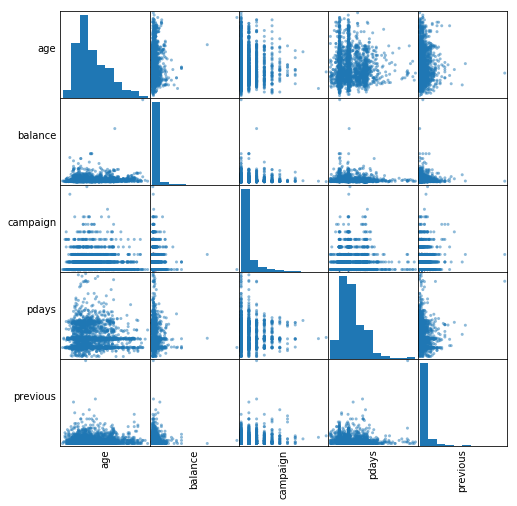

In [17]:
# scatter_matrix -> Draws a matrix of scatter plots

from pandas.plotting import scatter_matrix

numeric_data = df3.select(numeric_features).toPandas()
axs = scatter_matrix(numeric_data, figsize=(8, 8));

n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [18]:
# Pipeline is a powerful tool to standardise your operations and chain then in a sequence
# One hot encoding is a common pre-processing technique used to work with categorical features with the availability of multiple tools
# StringIndexer encodes a string column of labels to a column of label indices

from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoderEstimator, VectorAssembler, OneHotEncoder

# convert categorical features to numeric features  using One hot encoding
cols = ["job", 
        "marital",
        "education",
        "default",
        "housing",
        "loan",
        "poutcome",
        "deposit"]

for col in cols:
  stringIndexer = StringIndexer(inputCol=col, outputCol="{}Index".format(col))
  model = stringIndexer.fit(df3)
  indexed = model.transform(df3)

  encoder = OneHotEncoder(inputCol="{}Index".format(col), outputCol="{}Vec".format(col))
  df3 = encoder.transform(indexed)
  
df3.show()

+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+--------+--------------+------------+-------------+--------------+-------------+------------+-------------+------------+-------------+---------+-------------+-------------+-------------+------------+-------------+
|age|         job| marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|jobIndex|        jobVec|maritalIndex|   maritalVec|educationIndex| educationVec|defaultIndex|   defaultVec|housingIndex|   housingVec|loanIndex|      loanVec|poutcomeIndex|  poutcomeVec|depositIndex|   depositVec|
+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+--------+--------------+------------+-------------+--------------+-------------+------------+-------------+------------+-------------+---------+-------------+-------------+-------------+------------+-------------+
| 33|    services| married|secondary|

### 3.1 normalisation

In [19]:
# VectorAssembler is a transformer that combines a given list of columns into a single vector column

numeric_variables = [
    'age',
    'balance',
    'campaign',
    'pdays',
    'previous'
]


vecAssembler = VectorAssembler(inputCols=numeric_variables, outputCol="nums")
df3 = vecAssembler.transform(df3)
df3.show()

+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+--------+--------------+------------+-------------+--------------+-------------+------------+-------------+------------+-------------+---------+-------------+-------------+-------------+------------+-------------+--------------------+
|age|         job| marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|jobIndex|        jobVec|maritalIndex|   maritalVec|educationIndex| educationVec|defaultIndex|   defaultVec|housingIndex|   housingVec|loanIndex|      loanVec|poutcomeIndex|  poutcomeVec|depositIndex|   depositVec|                nums|
+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+--------+--------------+------------+-------------+--------------+-------------+------------+-------------+------------+-------------+---------+-------------+-------------+-------------+------------+----------

In [20]:
# MinMaxScaler transforms a dataset of Vector rows, rescaling each feature to a specific range (often [0, 1])  

from pyspark.ml.feature import MinMaxScaler
  
scaler = MinMaxScaler(inputCol="nums", outputCol="scaledNums")

# Compute summary statistics and generate MinMaxScalerModel
scalerModel = scaler.fit(df3)

# rescale each feature to range [min, max].
df3= scalerModel.transform(df3)

df3.show()

+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+--------+--------------+------------+-------------+--------------+-------------+------------+-------------+------------+-------------+---------+-------------+-------------+-------------+------------+-------------+--------------------+--------------------+
|age|         job| marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|jobIndex|        jobVec|maritalIndex|   maritalVec|educationIndex| educationVec|defaultIndex|   defaultVec|housingIndex|   housingVec|loanIndex|      loanVec|poutcomeIndex|  poutcomeVec|depositIndex|   depositVec|                nums|          scaledNums|
+---+------------+--------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+--------+--------------+------------+-------------+--------------+-------------+------------+-------------+------------+-------------+---------+-------------+---------

## 4. Unsupervised learning

### 4.1 K-means

In [21]:
#selectExpr is a variant of select that selects columns in a DataFrame while projecting SQL expressions

df4 = df3.selectExpr('scaledNums as features')
df4.show() 

+--------------------+
|            features|
+--------------------+
|[0.21428571428571...|
|[0.54285714285714...|
|[0.22857142857142...|
|[0.5,0.0390421465...|
|[0.27142857142857...|
|[0.38571428571428...|
|[0.4,0.0522509800...|
|[0.31428571428571...|
|[0.2,0.0680772321...|
|[0.17142857142857...|
|[0.4,0.0114192495...|
|[0.28571428571428...|
|[0.2,0.0233863309...|
|[0.18571428571428...|
|[0.45714285714285...|
|[0.41428571428571...|
|[0.58571428571428...|
|[0.18571428571428...|
|[0.5,0.0330525188...|
|[0.31428571428571...|
+--------------------+
only showing top 20 rows



In [22]:
# Perform unsupervised learning on df2 with k-means 
# you can use whole df2 as both training and testing data, 
# evaluate the clustering result using Accuracy.  

from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator


# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(df4)

# Make predictions
predictions = model.transform(df4)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.522351247162557
Cluster Centers: 
[0.56902673 0.03672264 0.06884636 0.21411016 0.03958198]
[0.236263   0.03077161 0.07730613 0.24694093 0.0383483 ]


In [23]:
pred = predictions.toPandas().prediction
#print(pred)
predictions.groupby('prediction').count().show()
#print(pred)

+----------+-----+
|prediction|count|
+----------+-----+
|         1| 1497|
|         0|  684|
+----------+-----+



### 4.2 PCA

In [24]:
# PCA is performed comparing the use of data with StandardScaler applied to unscaled data
 
from pyspark.ml.feature import PCA, StandardScaler
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

standardizer = StandardScaler(withMean=True, withStd=True,
                              inputCol='features',
                              outputCol='std_features')
model = standardizer.fit(df4)
df4 = model.transform(df4)

pca = PCA(k=2, inputCol="std_features", outputCol="pcaFeatures")
model = pca.fit(df4)

result = model.transform(df4).select("pcaFeatures")
result.show(truncate=False)

+-------------------------------------------+
|pcaFeatures                                |
+-------------------------------------------+
|[-0.03206393364201332,-0.5695096766392835] |
|[-0.3772084081851722,-0.9347358547052576]  |
|[-0.5681265078927981,0.06065592172107618]  |
|[-0.06012113550244991,-0.8308138210612721] |
|[0.5034177338153928,-0.3695510233860928]   |
|[-0.03334223417066565,-0.2973766989098179] |
|[-0.650210915702627,-0.9380769092136181]   |
|[0.0032346353284150586,-0.9814294185217675]|
|[-0.49916556510989607,-0.7067140999502876] |
|[-1.1466791071228188,0.18538762823511157]  |
|[-0.8702955344285754,-0.4190228530680751]  |
|[-0.24334308230992754,0.16238962917165192] |
|[-0.5025014483981541,0.15761255542155217]  |
|[1.2378127069841545,1.1894516705658138]    |
|[1.303297870733422,-2.5428754159246134]    |
|[-0.5634735106204192,-1.0956096736302374]  |
|[0.09696133506188287,-2.0453225013577585]  |
|[-0.3442984211635313,-1.0882011512412868]  |
|[1.378079213004206,0.195423700820

In [0]:
# generate a scatter plot using the first two PCA components to investigate the data distribution

# Scatterplot ca only be generated using Pandas 
# toPandas() -> Converts the dataframe to Panda dataframe
result = result.toPandas()

In [0]:
X, Y = zip(*result.pcaFeatures)

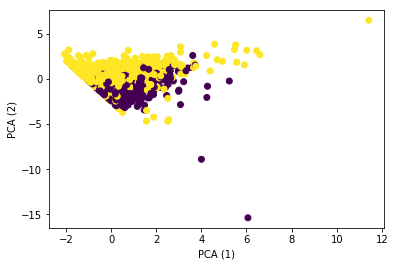

In [27]:
# matplotlib -> provides a MATLAB-like plotting framework

import matplotlib.pyplot as plt
plt.scatter(X[0:3340], Y[0:3340], c = pred)
plt.xlabel('PCA (1)')
plt.ylabel('PCA (2)')
plt.show()

## 5. Supervised learning

In [28]:
# selectExpr is a variant of select that selects columns in a DataFrame while projecting SQL expressions


df4 = df3.selectExpr('scaledNums as features', 'poutcomeIndex as label')
df4.show() 

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.21428571428571...|  0.0|
|[0.54285714285714...|  1.0|
|[0.22857142857142...|  0.0|
|[0.5,0.0390421465...|  1.0|
|[0.27142857142857...|  0.0|
|[0.38571428571428...|  0.0|
|[0.4,0.0522509800...|  1.0|
|[0.31428571428571...|  1.0|
|[0.2,0.0680772321...|  0.0|
|[0.17142857142857...|  0.0|
|[0.4,0.0114192495...|  0.0|
|[0.28571428571428...|  0.0|
|[0.2,0.0233863309...|  0.0|
|[0.18571428571428...|  0.0|
|[0.45714285714285...|  0.0|
|[0.41428571428571...|  0.0|
|[0.58571428571428...|  0.0|
|[0.18571428571428...|  0.0|
|[0.5,0.0330525188...|  0.0|
|[0.31428571428571...|  0.0|
+--------------------+-----+
only showing top 20 rows



In [29]:
train, test = df4.randomSplit([0.7, 0.3], seed = 742)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 1535
Test Dataset Count: 646


### 5.1 LogisticRegression

In [0]:
# Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator 

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(train)


# We can also use the multinomial family for binary classification
mlr = LogisticRegression(maxIter=10,
                         regParam=0.3,
                         elasticNetParam=0.8, 
                         family="multinomial")

# Fit the model
mlrModel = mlr.fit(train)

In [31]:
# exam the coefficients
# Print the coefficients and intercepts for logistic regression with multinomial family

print("Multinomial coefficients: " + str(mlrModel.coefficientMatrix))
print("Multinomial intercepts: " + str(mlrModel.interceptVector))

Multinomial coefficients: 2 X 5 CSRMatrix

Multinomial intercepts: [0.06589298179841327,-0.06589298179841327]


### 5.2 Decision tree

In [32]:
# Decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences   

from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol="label", 
                            featuresCol="features")

# Train model.  This also runs the indexers.
model = dt.fit(train)

# Make predictions.
predictions = model.transform(test)

# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       1.0|  1.0|[0.0,0.0188210659...|
|       1.0|  0.0|[0.02857142857142...|
|       1.0|  1.0|[0.04285714285714...|
|       1.0|  1.0|[0.05714285714285...|
|       0.0|  1.0|[0.05714285714285...|
+----------+-----+--------------------+
only showing top 5 rows

Test Error = 0.295666 


### 5.3 NaiveBayes

In [33]:
#Naive bayes is a probabilistic machine learning model that is used for classification task

from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# create the trainer and set its parameters
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")

# train the model
model = nb.fit(train)

# select example rows to display.
predictions = model.transform(test)
predictions.show()

# compute accuracy on the test set
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",
                                              metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[0.0,0.0188210659...|  1.0|[-0.7984706114202...|[0.53925235161110...|       0.0|
|[0.02857142857142...|  0.0|[-1.9839317759548...|[0.54462708663348...|       0.0|
|[0.04285714285714...|  1.0|[-0.8130847708611...|[0.53762411362300...|       0.0|
|[0.05714285714285...|  1.0|[-1.0441231259776...|[0.54397657885897...|       0.0|
|[0.05714285714285...|  1.0|[-0.9869717696311...|[0.54384103471045...|       0.0|
|[0.05714285714285...|  1.0|[-0.9419611061017...|[0.54497628307335...|       0.0|
|[0.05714285714285...|  1.0|[-1.0841874756700...|[0.54375039192719...|       0.0|
|[0.05714285714285...|  0.0|[-1.0368171145264...|[0.54471798765961...|       0.0|
|[0.05714285714285...|  0.0|[-1.1733917992993...|[0.54089653299452...|       0.0|
|[0.071428571428